# Used Car Price Prediction

## Problem Statement

In this project, we are building a predictive model on our used car dataset to predict the prices of cars.

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [4]:
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0


In [5]:
y_train.head()
y=y_train.drop('carID',axis=1)
y.head()

,price
0,31995
1,7700
2,58990
3,12999
4,16990


For now , we are going to focus on X_train since that is our training dataset.

In [6]:
#Checking the shape of data
X_train.shape

(4960, 10)

In [7]:
#checking of null values
print(X_train.isnull().sum())

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [8]:
#Statistical data of our dataset
print(X_train.describe())

              carID         year        mileage          tax          mpg  \
count   4960.000000  4960.000000    4960.000000  4960.000000  4960.000000   
mean   15832.446169  2016.737903   24956.286895   152.332661    50.370766   
std     2206.717006     2.884035   24443.333662    82.403844    35.746505   
min    12002.000000  1997.000000       1.000000     0.000000     2.800000   
25%    13929.250000  2016.000000    5641.250000   145.000000    38.700000   
50%    15840.000000  2017.000000   19000.000000   145.000000    47.100000   
75%    17765.750000  2019.000000   36702.000000   150.000000    54.300000   
max    19629.000000  2020.000000  259000.000000   580.000000   470.800000   

        engineSize  
count  4960.000000  
mean      2.124375  
std       0.789368  
min       0.000000  
25%       1.600000  
50%       2.000000  
75%       2.800000  
max       6.600000  


In [9]:
#dropping unnecessary columns
X_train.drop('carID',axis=1,inplace=True)
X_test.drop('carID',axis=1,inplace=True)

# Checking and Handling Outliers

Using boxplot, we can check whether we have outliers or not.

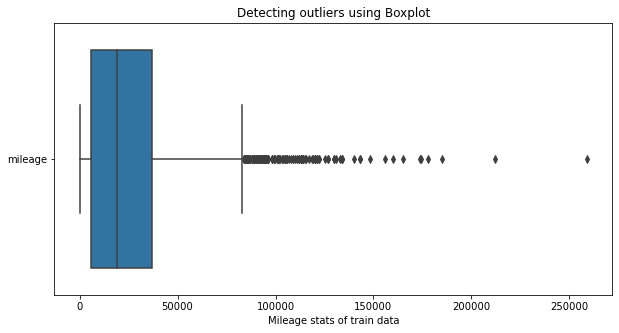

In [10]:
#boxplot
plt.figure(figsize=(10,5))
df1=X_train[['mileage']]
df2=X_train[['mpg']]
sns.boxplot(data=df1,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Mileage stats of train data')
plt.show()

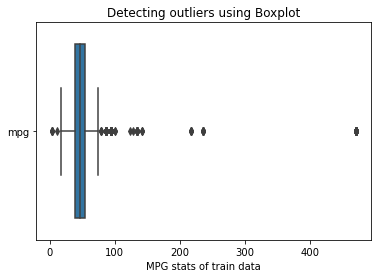

In [11]:
#boxplot for mpg
sns.boxplot(data=df2,orient="h")
plt.title("Detecting outliers using Boxplot")
plt.xlabel('MPG stats of train data')
plt.show()

## Using IQR

Detecting the outliers using Inter Quartile Range(IQR).

In [12]:
#using iqr
#training dataset
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("The Val of Q1 and Q2 : ",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("The lower & Upper Bound : ",lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
outliers_mileage = detect_outliers_iqr(X_train['mileage'])
outliers_mpg = detect_outliers_iqr(X_train['mpg'])
print("Number of outliers in mileage in our training dataset : ",len(outliers_mileage))
print("Number of outliers in mpg in our training dataset : ",len(outliers_mpg))

The Val of Q1 and Q2 :  5641.25 36702.0
The lower & Upper Bound :  -40949.875 83293.125
The Val of Q1 and Q2 :  38.7 54.3
The lower & Upper Bound :  15.300000000000011 77.69999999999999
Number of outliers in mileage in our training dataset :  289
Number of outliers in mpg in our training dataset :  289


Now that, we got the outliers.
We are going to handle Outliers using Quantile-based flooring and capping method.

In [13]:
#Quantile based flooring and capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
# Computing 10th, 90th percentiles and replacing the outliers

#FOR Mileage column
def floor_cap(x):
    tenth_percentile = np.percentile(x, 10)
    ninetieth_percentile = np.percentile(x, 90)
    print("10th percentile is ",tenth_percentile)
    print("90th percentile is ",ninetieth_percentile)

    b = np.where(x<tenth_percentile, tenth_percentile, x)

    new_data = np.where(b>ninetieth_percentile, ninetieth_percentile, b)

    return new_data

a=floor_cap(X_train['mileage'])
print("Outlier free mileage data: ",a)

print("------------------------------------------------------------------------------------------------------")

#for MPG column
b=floor_cap(X_train['mpg'])
print("Outlier free mpg data: ",b)

10th percentile is  1500.0
90th percentile is  56000.1
Outlier free mileage data:  [ 4223.  47870.   5151.  ... 56000.1 30150.  40230. ]
------------------------------------------------------------------------------------------------------
10th percentile is  32.8
90th percentile is  62.8
Outlier free mpg data:  [39.8 60.1 32.8 ... 60.1 62.8 56.5]


Text(0.5, 0, 'Mileage')

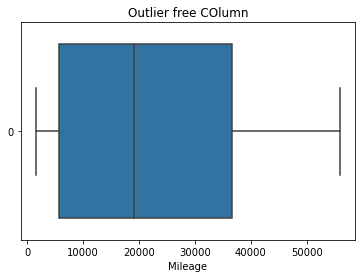

In [14]:
#We can see thorugh boxplot, we cleared outliers using flooring and capping
#mileage
sns.boxplot(data=a,orient="h")
plt.title("Outlier free COlumn")
plt.xlabel("Mileage")

Text(0.5, 0, 'MPG')

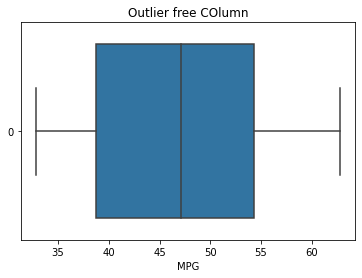

In [15]:
#mpg column
sns.boxplot(data=b,orient="h")
plt.title("Outlier free COlumn")
plt.xlabel("MPG")

Now, we are going to replace our old columns with corrected columns(outlier free column).

In [16]:
#X_train.drop(['mileage','mpg'],axis=1,inplace=True)
X_train['mileage'] = a
X_train['mpg'] = b
X_train.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,hyundi,Santa Fe,2019,Semi-Auto,4223.0,Diesel,145.0,39.8,2.2
1,vauxhall,GTC,2015,Manual,47870.0,Diesel,125.0,60.1,2.0
2,audi,RS4,2019,Automatic,5151.0,Petrol,145.0,32.8,2.9
3,vw,Scirocco,2016,Automatic,20423.0,Diesel,30.0,57.6,2.0
4,skoda,Scala,2020,Semi-Auto,3569.0,Petrol,145.0,47.1,1.0


Now our dataset is outlier free. 

# Converting Categorical Features

We need to convert categorical column to dummy variables.

In [17]:
#creating dummy variable for fueltype 
fueltype = pd.get_dummies(X_train['fuelType'],drop_first=True)
fueltype

,Electric,Hybrid,Other,Petrol
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
4955,0,0,0,0
4956,0,0,0,0
4957,0,0,0,0
4958,0,0,0,0


In [18]:
#creating dummy variable for transmission 
transmission = pd.get_dummies(X_train['transmission'],drop_first=True)
transmission

,Manual,Other,Semi-Auto
0,0,0,1
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
4955,0,0,0
4956,0,0,0
4957,1,0,0
4958,0,0,1


In [19]:
#dropping the categirocal data to replacing it with dummy variables
X_train.drop(['transmission','fuelType'],axis=1,inplace=True)
X_train.head()

,brand,model,year,mileage,tax,mpg,engineSize
0,hyundi,Santa Fe,2019,4223.0,145.0,39.8,2.2
1,vauxhall,GTC,2015,47870.0,125.0,60.1,2.0
2,audi,RS4,2019,5151.0,145.0,32.8,2.9
3,vw,Scirocco,2016,20423.0,30.0,57.6,2.0
4,skoda,Scala,2020,3569.0,145.0,47.1,1.0


In [20]:
X_train = pd.concat([X_train,transmission,fueltype],axis=1)
X_train.head()

,brand,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,Hybrid,Other,Petrol
0,hyundi,Santa Fe,2019,4223.0,145.0,39.8,2.2,0,0,1,0,0,0,0
1,vauxhall,GTC,2015,47870.0,125.0,60.1,2.0,1,0,0,0,0,0,0
2,audi,RS4,2019,5151.0,145.0,32.8,2.9,0,0,0,0,0,0,1
3,vw,Scirocco,2016,20423.0,30.0,57.6,2.0,0,0,0,0,0,0,0
4,skoda,Scala,2020,3569.0,145.0,47.1,1.0,0,0,1,0,0,0,1


# Feature Scaling 

We are using Normalization method to scale our dataset.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scale = MinMaxScaler()

In [23]:
X_train_scaled=scale.fit_transform(X_train[['mileage','mpg','engineSize','tax']])
X_train_scaled

array([[0.04996321, 0.23333333, 0.33333333, 0.25      ],
       [0.85082413, 0.91      , 0.3030303 , 0.21551724],
       [0.0669907 , 0.        , 0.43939394, 0.25      ],
       ...,
       [1.        , 0.91      , 0.3030303 , 0.05172414],
       [0.52568711, 1.        , 0.45454545, 0.25      ],
       [0.7106409 , 0.79      , 0.45454545, 0.25862069]])

In [24]:
X_train[['mileage','mpg','engineSize','tax']]=X_train_scaled
X_train

,brand,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,Hybrid,Other,Petrol
0,hyundi,Santa Fe,2019,0.049963,0.250000,0.233333,0.333333,0,0,1,0,0,0,0
1,vauxhall,GTC,2015,0.850824,0.215517,0.910000,0.303030,1,0,0,0,0,0,0
2,audi,RS4,2019,0.066991,0.250000,0.000000,0.439394,0,0,0,0,0,0,1
3,vw,Scirocco,2016,0.347210,0.051724,0.826667,0.303030,0,0,0,0,0,0,0
4,skoda,Scala,2020,0.037963,0.250000,0.476667,0.151515,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,merc,GL Class,2015,0.418605,0.215517,0.793333,0.318182,0,0,0,0,0,0,0
4956,bmw,6 Series,2017,0.302752,0.250000,0.620000,0.454545,0,0,0,0,0,0,0
4957,vw,CC,2015,1.000000,0.051724,0.910000,0.303030,1,0,0,0,0,0,0
4958,audi,A7,2017,0.525687,0.250000,1.000000,0.454545,0,0,1,0,0,0,0


Now our dataset is ready for training.

In [25]:
x=pd.concat([X_train,y],axis=1)
x.head()

,brand,model,year,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Electric,Hybrid,Other,Petrol,price
0,hyundi,Santa Fe,2019,0.049963,0.250000,0.233333,0.333333,0,0,1,0,0,0,0,31995
1,vauxhall,GTC,2015,0.850824,0.215517,0.910000,0.303030,1,0,0,0,0,0,0,7700
2,audi,RS4,2019,0.066991,0.250000,0.000000,0.439394,0,0,0,0,0,0,1,58990
3,vw,Scirocco,2016,0.347210,0.051724,0.826667,0.303030,0,0,0,0,0,0,0,12999
4,skoda,Scala,2020,0.037963,0.250000,0.476667,0.151515,0,0,1,0,0,0,1,16990


In [26]:
x.columns

Index(['brand', 'model', 'year', 'mileage', 'tax', 'mpg', 'engineSize',
       'Manual', 'Other', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='brand', ylabel='count'>

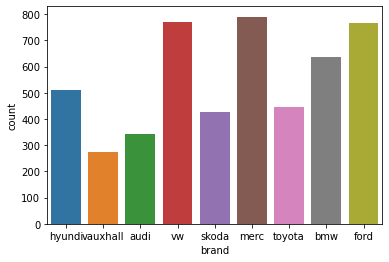

In [27]:
#checking the brands of cars
sns.countplot(data=x,x="brand")


<AxesSubplot:>

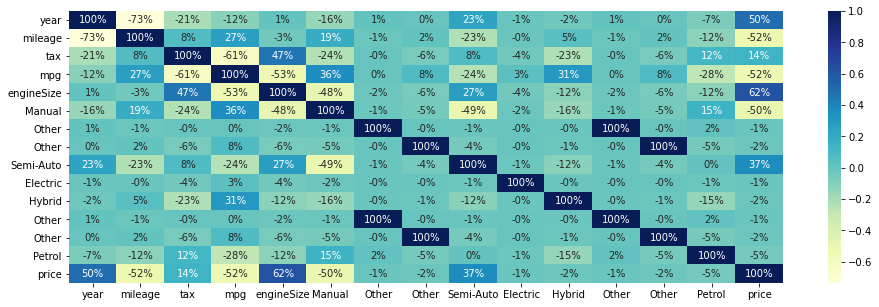

In [28]:
plt.figure(figsize=(16,5))
sns.heatmap(x[['year', 'mileage', 'tax', 'mpg', 'engineSize',
       'Manual', 'Other', 'Semi-Auto', 'Electric', 'Hybrid', 'Other', 'Petrol',
       'price']].corr(),annot=True, fmt=".0%", cmap="YlGnBu")

As we can see from heatmap that attributes that are mostly affecting the prices are purchase year of car, mileage, enginesize and transmission type.

Lets plot few charts to get the exact relation of attributes with price.

<AxesSubplot:xlabel='year', ylabel='price'>

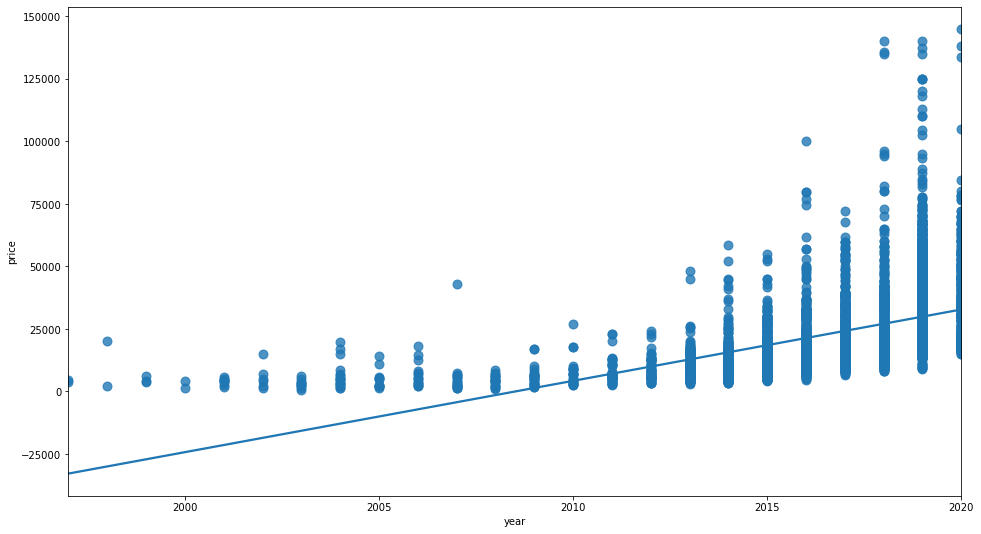

In [29]:
plt.figure(figsize=(16,9))
sns.regplot(x="year", y="price", data=x, ci = None ,scatter_kws={"s": 80})

<AxesSubplot:xlabel='mileage', ylabel='price'>

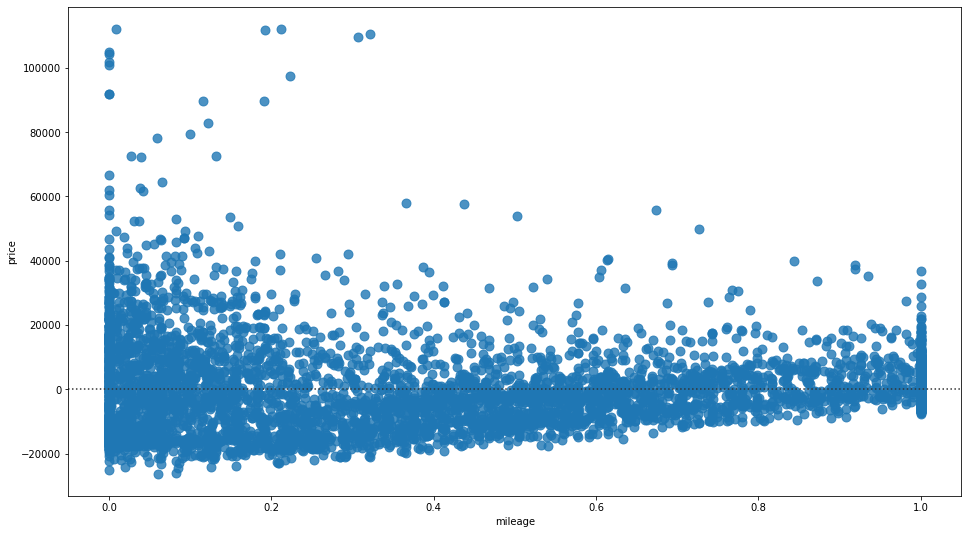

In [36]:
plt.figure(figsize=(16,9))
sns.residplot(x="mileage", y="price",data=x, scatter_kws={"s": 80})

<Figure size 720x720 with 0 Axes>

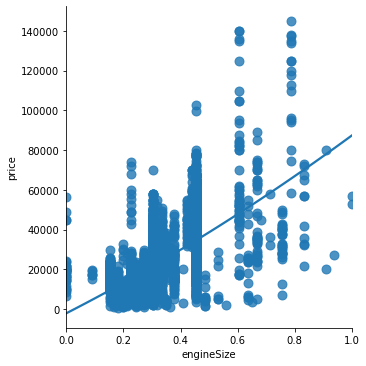

In [39]:
plt.figure(figsize=(10,10))
sns.lmplot(x="engineSize", y="price", data=x,
           order=2, ci=None, scatter_kws={"s": 80})

From plots we get that simple regression model is not apporpriate for our prediction.

# Algorithms